# Laplace Equation

## Some Keybord Shortcut:

Example markdown file are found at: https://wakari.io/notebook/Lecture_3_Scipy.ipynb

We want to solve Laplace equation both analytically and Computationally.

Laplace equation in 2D is :
    $\frac{d^2U}{dx^2} + \frac{d^2U}{dy^2} = 0$

## Analytic Solution

By considering

$U(x,y) = X(x)Y(y)$

one can solve the equation to get analytic solution using periodic boundary conditions

$U(x,y) = \sum_{n=1}^{\infty}E_{n} \sin \frac{n\pi x}{L}\sinh\frac{n\pi y}{L}$

Where $E_n$ is a constant to be set by further boundary condition.

##  Computational Method 

There are two methods

### Method of finite Difference

We divide the entire square in to the  lattice with equal spacing $\triangle$ in both in the x and y directions. The x and y variables are now discrete:

$x = x_o + i\triangle$;

$y = y_o + i\triangle$;

Where, $i,j = 0,N_{max} = L/D$

We represent the potential by the arrey $U(N_{Max},N_{Max})$. 

### Finite Difference Algorithm 



$U(i,j) = \frac{1}{4}[U(i+1,j)+ U(i-1,j) + U(i,j+1) + U(i,j-1)]$

### Boundary Conditions

$U(i,N_{max}) = 100,$ (top)

$U(1,j) = 0,$ (left)

$U(N_{max},j) = 0,$ (right)

$U(i,1) = 0,$ (bottom)

We define a function to control boundary conditions.

### Coding

In [59]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

In [60]:
'''constants'''
N = 100           # Number of lattice points
Nitr =  1000      # Number of iterations

In [61]:

def fun(k):
    if k == 0:
        return 1
    else:
        return 0


Initiate list to hold 2D array of U

In [62]:
U = [[0.0 for x in range(N)]for y in range(N)]

Now we want to impose boundary conditions


In [63]:
def boundary_conditions(U):
    for i in range(N):
        U[i][N-1] = 100.0
    for j in range(N):
        U[0][j] = 0.0
    for j in range(N):
        U[N-1][j] = 0.0
    for i in range(N):
        U[i][0] = 0.0
    return U

Now we iterate with this begining configurations:

In [64]:
itr = 0
boundary_conditions(U)
while itr < Nitr:
    for i in range(N):
        for j in range(N):
             U[i][j] = (0.25)*(U[(i+1)%N][j] + U[(i-1)+(fun(i)*N)][j] + U[i][(j+1)%N] + U[i][(j-1)+(fun(j)*N)])
    boundary_conditions(U)
    itr = itr+1

In [65]:
#print U

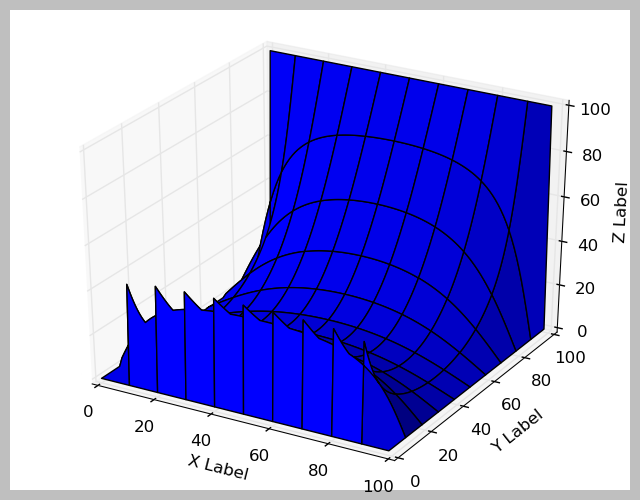

In [67]:
def val(i,j):
    return U[i][j]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(0, N, 1)
X, Y = np.meshgrid(x, y)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


zs = np.array([val(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)

plt.show()